### 지난 시간 복습

- 어제 DOM을 배움. DOM은 HTML을 각각의 태그를 하나의 노드로 삼아서 태그들의 Tree 를 만들어놓은 결과물.
- DOM은 트리구조이기 때문에 루트부터 리프까지 탐색할 수 있었고 거기에 find 를 사용함
- find, find_all 등등 을 가지고 찾는 과정은 트리를 가지고 찾는 거여서 나의 자식을 탐색할 것인지 자손, 부모, 조상, 형제를 탐색할 것인지에
따라 사용하는 함수들이 달랐음. 그것을 이용해서 돔에서 해당 노드에서 출발해서 원하는 결과물이 있는 HTML TAG 까지 가는 연습을 해봄.
- find 와 find_all 관련해서 정규식을 섞어서 사용 가능했음. limit(몇개까지), recursive(자식/자손 혹은 부모/조상) 옵션이 있었음.
- 그래서 간단하게 HTML을 하나 만들어서 탐색해봄. 그런데 HTML은 Not-wellformed 라서 규약이 잘 지켜지지 않아도 문제가 없었음.
- 그래서 우리는 3개의 Parser를 봄. 3개의 Parser가 내장되어 있는 html.parser, lxml, html5lib 얘네 들이 HTML 만났을 때 해석하는 방식이 좀
달랐음. 속도는 느리더라도 웹 브라우저랑 동일한 결과를 얻고 싶으면 html5lib을 쓰면 좋았음. 속도가 중요하고 xml 같은 well-formed 인 경우
lxml 이 좋았음. 무난하게는 내장된 html.parser.
- 그러고 나서 실질적으로 웹에 접근해봤음. 구글, 네이버, 다음 검색결과까지 가져올 수 있었음.
- 문자열을 어떻게 하면 파싱을 잘해서 내가 원하는 데이터를 가져올까? -> 정규식 이용.
- 여기에는 각 사이트의 구조를 알았어야 함. 그러나 돔의 노드는 태그의 이름에 대응되기 때문에, html 태그를 통해서 탐색할 수는 있었음.
- 디테일적으로 부가적인 다른 어트리뷰트, id, class 등을 통해서 찾아가는 연습을 했음.

- 오늘은 CSS Selector 를 배울 것. 결론적으로 우리는 이것을 쓸 것.
- css 문법으로 구성이 되어있음. 리액트 등도 css selector 에서 사용되는 select 를 이용해서 태그를 지칭할 수 있음.
- 알고 있으면 매우 도움됨.
- 태그들을 지정해서 셀렉트 가능. 가상 선택자 등등

### 수업 시작

#### css selector

In [ ]:
# 브라우저에서 일어나는 일들, 즉 req/resp 끝나고의 일들.
# 구조와 내용을 담은 html 문서를 받음. 그 문서 속에 포함된 링크들을 가지고 자바스크립트, 이미지 등을 받았을 것.
# 여기서는 object model 과 관련해서 트리를 가지고 있는 거에 대해 볼 것. 스타일 시트는 스타일(화면에 어떻게 그릴 것인가)을 담고 있음
# html 파서를 이용하면 제일 최상단의 #document 루트를 가지는 돔 트리 형태를 얻을 수 있음.
# 스타일 시트는 이중의 어떤 html 요소는 화면에 어떤 스타일로 보여야 한다 이렇게 구성됨.
# 따라서 얘도 태그를 정확히 지칭해줘야 함. 그래야 걔에 대한 화면 요소를 바꿔줄 수 있음. 마찬가지로 css 파서를 이용해서 규칙을 만듦
# 그것을 CSSOM이라고 함. DOM 과 하는 일은 같음. 어떤 태그가 누구 밑에 있고 어떤 관계인지를 DOM 이 가지면 CSSOM 이 개입
# 그 둘을 Render Tree 로 합침.
# DOM 과 CSSOM 은 다 같은 태그 객체

In [ ]:
# CSS 어떻게 규칙을 가지고 문법을 가질까? / css selector
# h1(selector) {color:red; font-size:10;}

In [ ]:
# select 안에 들어갈 수 있는 것
# HTML 태그, 속성(ID, class, href, src, data-...), 구조, 가상선택자 가능

In [1]:
from bs4 import BeautifulSoup

In [10]:
html = '''
    <html>
        <head></head>
        <body>
            <div>
                <uL>
                    <li>                   
                    <li>                   
            </DIV>                         
                </Ul>
        </body>
    </html>
'''

In [11]:
dom = BeautifulSoup(html, 'html.parser')

In [12]:
# selector 가 들어감 - html tag
dom.select('div')

[<div>
 <ul>
 <li>
 <li>
 </li></li></ul></div>]

In [13]:
# html tag 가능
dom.select('li')

[<li>
 <li>
 </li></li>,
 <li>
 </li>]

In [14]:
# ' '(띄어쓰기) => 자손,  '>' => 자식,  '+' => next sibling(형제)
dom.select('div > ul')  # dom.find(div, recursive=False).find(ul)과 같은 결과임.

[<ul>
 <li>
 <li>
 </li></li></ul>]

In [33]:
dom.div.find('ul', recursive=False)

<ul>
<li>
<li>
</li></li></ul>

In [19]:
dom.find('ul')

<ul>
<li>
<li>
</li></li></ul>

In [34]:
dom.select('div ul') # 띄어쓰기는 자손

[<ul>
 <li>
 <li>
 </li></li></ul>]

In [36]:
dom.select('div > ul'),\
dom.select('div li')

([<ul>
  <li>
  <li>
  </li></li></ul>],
 [<li>
  <li>
  </li></li>,
  <li>
  </li>])

In [37]:
dom.select('div > li'),\
dom.select('div li')

([],
 [<li>
  <li>
  </li></li>,
  <li>
  </li>])

In [ ]:
# 즉 > 를 쓰면 바로 내 직접적 자식을 찾음. > 다음에 기준의 자식이 나오지 않으면 none이 나옴(자손이 나올경우)
# 각각의 선택자 사이에 화이트스페이스로 태그를 쓰면 자손. 
# body 에 있는 자손 중에 div 의 자손중에 li를 찾아라 => body div li
# bdoy 의 내 밑에 있는 자식 중 div, div 중에 바로 자식 li : body > div > li
# html 태그와 구조를 같이 담을 수 있는 것.
# 단점은 find는 내 이전(부모 등)을 찾을 수 있었는데 select는 못함.
# 그 떄 가상 선택자가 필요함

In [40]:
dom.select('li:has(li)'),dom.select('li li')
# li 라고 하는 자손요소를 가지고 있는 li  과   li 자손 중의 자손. 마지막 li

([<li>
  <li>
  </li></li>],
 [<li>
  </li>])

In [ ]:
# 다음 예제를 보자

In [41]:
html = '''
    <html>
        <head></head>
        <body>
            <div id="a">
                <uL>
                    <li class="a"></li>
                    <li class="a b"></li>
            </DIV>                         
                </Ul>
        </body>
    </html>
'''

In [42]:
dom = BeautifulSoup(html, 'html.parser')

In [43]:
# ID를 나타낼 때는 # : #ID
# class를 나타낼 때는 . : .class,  (이어쓸때) .class1.class2 , [class=blahblah]
dom.select('#a')

[<div id="a">
 <ul>
 <li class="a"></li>
 <li class="a b"></li>
 </ul></div>]

In [44]:
dom.select('#a, div, div#a, div[id=a]') # 다 같은 애들

[<div id="a">
 <ul>
 <li class="a"></li>
 <li class="a b"></li>
 </ul></div>]

In [48]:
dom.select_one('#a')

<div id="a">
<ul>
<li class="a"></li>
<li class="a b"></li>
</ul></div>

In [45]:
dom.select_one('#a') is dom.select_one('div')

True

In [24]:
dom.select_one('#a') is dom.select_one('div#a')

True

In [25]:
dom.select_one('#a') is dom.select_one('[id=a]')

True

In [49]:
# *는 body 에 있는 모든 '자식(바로 한단계 아래)'. 이 예제에서만 맞을 것
dom.select_one('#a') is dom.select_one('body > *')

True

In [28]:
dom.select_one('#a') is dom.select_one('*:has(> ul)')

True

In [52]:
dom.select('*:has(>ul)')

[<div id="a">
 <ul>
 <li class="a"></li>
 <li class="a b"></li>
 </ul></div>]

In [53]:
# ul을 '자손'으로 가지고 있는 애들이 다 나옴
dom.select('*:has(ul)') # 여기서 '자식'으로 ul을 들고 있는 애들 원했기 때문에 위로 바꾼 것.

[<html>
 <head></head>
 <body>
 <div id="a">
 <ul>
 <li class="a"></li>
 <li class="a b"></li>
 </ul></div>
 
 </body>
 </html>,
 <body>
 <div id="a">
 <ul>
 <li class="a"></li>
 <li class="a b"></li>
 </ul></div>
 
 </body>,
 <div id="a">
 <ul>
 <li class="a"></li>
 <li class="a b"></li>
 </ul></div>]

In [ ]:
# 여기까지 다 같은 애들. 지칭하는 방법이 이렇게 많음.

In [54]:
dom.select_one('li')

<li class="a"></li>

In [55]:
dom.select_one('li'), dom.select_one('li + li') # 뒤의 것은 next 를 뜻함(+)

(<li class="a"></li>, <li class="a b"></li>)

In [ ]:
# 첫번째
li == ul > li == .a == li.a == li:has(+li) == li:first-child

In [60]:
dom.select_one('li:has(li)')

In [61]:
dom.select_one('li:has(+li)')

<li class="a"></li>

In [62]:
dom.select_one('li:nth-of-type(1)')
# 가상 선택자가 여러개가 있는데 지원하는 것이 이정도. beautifulsoup에서 지원하는 것은
# 종류가 같은 것중에 n번째(nth) 중에 1번째 (맨앞에서부터 1번째임)

<li class="a"></li>

In [ ]:
# 두번째
li == ul > li + li == .b == .a.b == li:last-child == [class^$~=b]

In [34]:
dom.select_one('li:last-child')  # 이것도 가상선택자

<li class="a b"></li>

In [63]:
dom.select_one('ul > li + li')

<li class="a b"></li>

In [64]:
dom.select_one('[class~=b]')

<li class="a b"></li>

In [70]:
from requests import request

url = 'http://pythonscraping.com/pages/page3.html'
resp = request('GET', url)
dom = BeautifulSoup(resp.text, 'html.parser')

In [ ]:
# 이제는 selector 를 가지고 지칭할 것.
# 이미지 가져오는 예제를 해보자

In [71]:
dom.select('img[src$=jpg]')   # src$=jpg 는 jpg 로 끝나는 src를 가지고 있는 것

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [72]:
dom.select('table img[src$=jpg]')  # table 밑에 있는 자손들 중에 img가 jpg로 끝나는
# 구조를 같이 담았기 때문에 내가 탐색하는 애를 정확히 지칭할 수 있음.
# 구조를 가지고 누구 밑에 있는 자손들이라고 지칭해버리니까 딱 table 내에서만 탐색함
# img 태그의 속성값 src='.......jpg'  이것은 반드시 src 라는 속성값을 가짐을 뜻함
# 즉 여기에 매칭되었다는 것은 src가 반드시 있었다는 것

[<img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [73]:
dom.select('a[href]') # 이렇게 하면 무조건 있는 애들이 나옴(href가 있는)
# 그러면 우리가 값이 있는지 없는지 볼 필요가 없음( 선택자를 이용하면)

[]

In [74]:
dom.select('tr > td:nth-of-type(3)')  # 컬럼 별로 가져왔을 것
# 이것의 의미는? => tr 에 있는 자식 요소들 중에 td를 검사
# tr은 많이 있음. 그걸 각각의 행으로 봤을 때 같은 td 들 중에 3번째 td를 찾으라는 것. 그래서 열 단위로 가져옴

[<td>
 $15.00
 </td>,
 <td>
 $10,000.52
 </td>,
 <td>
 $10,005.00
 </td>,
 <td>
 $0.50
 </td>,
 <td>
 $1.50
 </td>]

In [75]:
import re

[re.search('[$][0-9.]+', td.get_text()) for td in dom.select('tr > td:nth-of-type(3)')]

[<re.Match object; span=(1, 7), match='$15.00'>,
 <re.Match object; span=(1, 4), match='$10'>,
 <re.Match object; span=(1, 4), match='$10'>,
 <re.Match object; span=(1, 6), match='$0.50'>,
 <re.Match object; span=(1, 6), match='$1.50'>]

In [76]:
[re.search('[$][0-9.]+', td.get_text()).group() for td in dom.select('tr > td:nth-of-type(3)')]

['$15.00', '$10', '$10', '$0.50', '$1.50']

In [77]:
url = 'http://pythonscraping.com/pages/wikipedia.html'
resp = request('GET', url)
dom = BeautifulSoup(resp.text, 'html.parser')

In [78]:
dom.select('div:has(> input[type=radio])'), len(dom.select('div:has(> input[type=radio])'))

([<div style="position:inline-block;padding-left:20px;height:600px;overflow:auto;">
  <input checked="" name="language" onclick="showValue()" type="radio" value="en"/>English<br/>
  <input name="language" onclick="showValue()" type="radio" value="fr"/>French<br/>
  <input name="language" onclick="showValue()" type="radio" value="zh"/>Chinese<br/>
  <input name="language" onclick="showValue()" type="radio" value="ceb"/>Cebuano<br/>
  <input name="language" onclick="showValue()" type="radio" value="vi"/>Vietnamese<br/>
  <input name="language" onclick="showValue()" type="radio" value="ca"/>Catalan<br/>
  <input name="language" onclick="showValue()" type="radio" value="de"/>German<br/>
  <input name="language" onclick="showValue()" type="radio" value="it"/>Italian<br/>
  <input name="language" onclick="showValue()" type="radio" value="hu"/>Hungarian<br/>
  <input name="language" onclick="showValue()" type="radio" value="eo"/>Esperanto<br/>
  <input name="language" onclick="showValue()" ty

In [79]:
dom.select('div:has(> input[type=radio])')[0].get_text().split()

['English',
 'French',
 'Chinese',
 'Cebuano',
 'Vietnamese',
 'Catalan',
 'German',
 'Italian',
 'Hungarian',
 'Esperanto',
 'Czech',
 'Finnish',
 'Danish',
 'Japanese',
 'Spanish',
 'Russian',
 'Dutch',
 'Malay',
 'Portuguese',
 'Norwegian',
 'Serbian',
 'Indonesian',
 'Korean',
 'Swedish',
 'Turkish',
 'Slovak',
 'Ukranian',
 'Polish']

In [80]:
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
}
url = 'https://www.google.com/search'
params = {'q':'한소희'}
resp = request('GET', url, params=params, headers=headers)
dom = BeautifulSoup(resp.text, 'html.parser')

In [81]:
resp.url

'https://www.google.com/search?q=%ED%95%9C%EC%86%8C%ED%9D%AC'

[<a data-ved="2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBoQAQ" href="https://namu.wiki/w/%ED%95%9C%EC%86%8C%ED%9D%AC" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://namu.wiki/w/%25ED%2595%259C%25EC%2586%258C%25ED%259D%25AC&amp;ved=2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBoQAQ"><br/><h3 class="LC20lb MBeuO DKV0Md">한소희 - 나무위키</h3><div class="TbwUpd NJjxre iUh30 ojE3Fb"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf LCUpfd"></div></span><div><span class="VuuXrf">namu.wiki</span><div class="byrV5b"><cite class="qLRx3b tjvcx GvPZzd cHaqb" role="text" style="max-width:330px">https://namu.wiki<span class="dyjrff qzEoUe" role="text"> › 한소희</span></cite></div></div></div></a>,
 <a data-ved="2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBkQAQ" href="https://www.instagram.com/xeesoxee/?hl=ko" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.instagram.com/xeesoxee/%3Fhl%3Dko&amp;ved=2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBkQAQ"><br/><h3 class="LC20lb MBeuO DKV0Md">
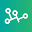
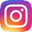
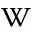
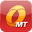
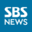
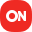
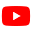
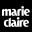

In [82]:
dom.select('a:has(>.LC20lb)')

[<a data-ved="2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBoQAQ" href="https://namu.wiki/w/%ED%95%9C%EC%86%8C%ED%9D%AC" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://namu.wiki/w/%25ED%2595%259C%25EC%2586%258C%25ED%259D%25AC&amp;ved=2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBoQAQ"><br/><h3 class="LC20lb MBeuO DKV0Md">한소희 - 나무위키</h3><div class="TbwUpd NJjxre iUh30 ojE3Fb"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf LCUpfd"></div></span><div><span class="VuuXrf">namu.wiki</span><div class="byrV5b"><cite class="qLRx3b tjvcx GvPZzd cHaqb" role="text" style="max-width:330px">https://namu.wiki<span class="dyjrff qzEoUe" role="text"> › 한소희</span></cite></div></div></div></a>,
 <a data-ved="2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBkQAQ" href="https://www.instagram.com/xeesoxee/?hl=ko" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.instagram.com/xeesoxee/%3Fhl%3Dko&amp;ved=2ahUKEwj8qYjT1eD9AhWDad4KHT0wBR8QFnoECBkQAQ"><br/><h3 class="LC20lb MBeuO DKV0Md">
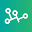
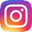
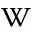
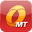
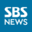
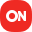
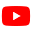
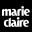

In [83]:
dom.select('a:has( .LC20lb)')

In [84]:
len(dom.select('a:has(>.LC20lb)'))

9

In [85]:
len(dom.select('a:has( .LC20lb)'))

9

In [86]:
for a in dom.select('a:has(>.LC20lb)'):
    print(a.attrs['href'])
    print(a.get_text().strip())

https://namu.wiki/w/%ED%95%9C%EC%86%8C%ED%9D%AC
한소희 - 나무위키namu.wikihttps://namu.wiki › 한소희
https://www.instagram.com/xeesoxee/?hl=ko
한소희 (@xeesoxee) • Instagram photos and videosinstagram.comhttps://www.instagram.com › xeesoxee
https://ko.wikipedia.org/wiki/%ED%95%9C%EC%86%8C%ED%9D%AC
한소희 - 위키백과, 우리 모두의 백과사전wikipedia.orghttps://ko.wikipedia.org › wiki › 한소희
https://news.mt.co.kr/mtview.php?no=2023012509243970933
한소희, 만취해 大자로 뻗은 모습 '셀프 폭로'…"다시는 안 ...mt.co.krhttps://news.mt.co.kr › mtview
https://mobile.newsis.com/view.html?ar_id=NISX20230124_0002168088
한소희, 만취해 길거리에 大자로…"다시는 술 먹지 않겠습니다"newsis.comhttps://mobile.newsis.com › view
https://news.sbs.co.kr/news/endPage.do?news_id=N1007054804
술 먹고 大자로 뻗은 한소희…"다시는 술을 먹지 않겠습니다"sbs.co.krhttps://news.sbs.co.kr › 일반기사 › 연예
https://www.lotteon.com/search/search/search.ecn?render=search&platform=m&q=%ED%95%9C%EC%86%8C%ED%9D%AC&mallId=1
한소희 : 롯데ONlotteon.comhttps://www.lotteon.com › search › search › search › q...
https://www.youtube.com/watch?v=D9foI

In [87]:
for a in dom.select('a:has(>.LC20lb)'):
    print(a.attrs['href'])
    print(a.select_one('.LC20lb').get_text().strip())
    print(a.get_text().strip())

https://namu.wiki/w/%ED%95%9C%EC%86%8C%ED%9D%AC
한소희 - 나무위키
한소희 - 나무위키namu.wikihttps://namu.wiki › 한소희
https://www.instagram.com/xeesoxee/?hl=ko
한소희 (@xeesoxee) • Instagram photos and videos
한소희 (@xeesoxee) • Instagram photos and videosinstagram.comhttps://www.instagram.com › xeesoxee
https://ko.wikipedia.org/wiki/%ED%95%9C%EC%86%8C%ED%9D%AC
한소희 - 위키백과, 우리 모두의 백과사전
한소희 - 위키백과, 우리 모두의 백과사전wikipedia.orghttps://ko.wikipedia.org › wiki › 한소희
https://news.mt.co.kr/mtview.php?no=2023012509243970933
한소희, 만취해 大자로 뻗은 모습 '셀프 폭로'…"다시는 안 ...
한소희, 만취해 大자로 뻗은 모습 '셀프 폭로'…"다시는 안 ...mt.co.krhttps://news.mt.co.kr › mtview
https://mobile.newsis.com/view.html?ar_id=NISX20230124_0002168088
한소희, 만취해 길거리에 大자로…"다시는 술 먹지 않겠습니다"
한소희, 만취해 길거리에 大자로…"다시는 술 먹지 않겠습니다"newsis.comhttps://mobile.newsis.com › view
https://news.sbs.co.kr/news/endPage.do?news_id=N1007054804
술 먹고 大자로 뻗은 한소희…"다시는 술을 먹지 않겠습니다"
술 먹고 大자로 뻗은 한소희…"다시는 술을 먹지 않겠습니다"sbs.co.krhttps://news.sbs.co.kr › 일반기사 › 연예
https://www.lotteon.com/search/search/sea

In [88]:
url = 'https://search.naver.com/search.naver'
params = {'query':'한소희',
         'where':'nexearch'}
resp = request('GET', url, params=params, headers=headers)
dom = BeautifulSoup(resp.text, 'html.parser')

In [89]:
resp.url

'https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch'

In [90]:
len(dom.select('.link_tit, .news_tit, .name_link, .total_tit'))

25

In [91]:
dom.select('.link_tit, .news_tit, .name_link, .total_tit')

[<div class="total_tit"><div class="ico_wrap"></div><a class="link_tit" href="https://namu.wiki/w/%ED%95%9C%EC%86%8C%ED%9D%AC" onclick='goOtherCR(this,"a=sit_4po*e.link&amp;r=0&amp;i=a00000fa_11653c551ac4daca6439c7ce&amp;u="+urlencode(this.href))' target="_blank"><mark>한소희</mark> - 나무위키</a></div>,
 <a class="link_tit" href="https://namu.wiki/w/%ED%95%9C%EC%86%8C%ED%9D%AC" onclick='goOtherCR(this,"a=sit_4po*e.link&amp;r=0&amp;i=a00000fa_11653c551ac4daca6439c7ce&amp;u="+urlencode(this.href))' target="_blank"><mark>한소희</mark> - 나무위키</a>,
 <div class="total_tit"><div class="ico_wrap"><i class="spnew api_ico_certify">인증</i></div><a class="link_tit" href="https://www.instagram.com/xeesoxee/" onclick='goOtherCR(this,"a=sit_4po*e.link&amp;r=1&amp;i=a00000fa_8ce049676beb4eacd5d6ff42&amp;u="+urlencode(this.href))' target="_blank"><mark>한소희</mark>(@xeesoxee) • Instagram 사진 및 동영상</a></div>,
 <a class="link_tit" href="https://www.instagram.com/xeesoxee/" onclick='goOtherCR(this,"a=sit_4po*e.link&am

In [92]:
for a in dom.select('a.link_tit, a.news_tit, a.name_link, a.total_tit'):
    print(a.get_text().strip())
    print(a.attrs['href'])

한소희 - 나무위키
https://namu.wiki/w/%ED%95%9C%EC%86%8C%ED%9D%AC
한소희(@xeesoxee) • Instagram 사진 및 동영상
https://www.instagram.com/xeesoxee/
[얼마예요] “제니가고 한소희 왔다”…‘포스트 이효리’ 노리는 소주 모델들...
https://economist.co.kr/article/view/ecn202303060021
'처음처럼' 모델, 제니→한소희 교체
http://news.mt.co.kr/mtview.php?no=2023030309434084113
한소희 '자낳괴' 였네. 소주모델 발탁 후 '금주 선언' 급취소 폭소
http://www.sportsseoul.com/news/read/1202946?ref=naver
한소희, 금주 선언 한달만에.."취소" 선언 사연은?
https://www.starnewskorea.com/stview.php?no=2023030710265572973
신데렐라의 성장기, 한소희 : 여성동아
https://woman.donga.com/3/all/12/3010828/1
한소희 - 씨네21
http://www.cine21.com/db/person/info/?person_id=104232
한소희X차은우 만났다…美친 비주얼 케미 포착(악마리) - 조선비즈
https://biz.chosun.com/entertainment/tv/2022/09/27/MVYMIJ7JSJBAU674XDFI6FAPEM/
이것도 품절되는 거 아니야? 한소희 3만원대 코프 coap 니트
https://in.naver.com/nilla/contents/internal/533066569133344?areacode=ink*A&query=%ED%95%9C%EC%86%8C%ED%9D%AC
회자되는 2020 여자헤어스타일 여다경머리 한소희 is 뭔들!
https://in.naver.com/dndkwls_/contents/internal/537643009016768?areacode=ink*A&

In [ ]:
# 어제 작업들이랑 비교해서 얼마나 편해졌는지 체감할 것

In [65]:
'https://comic.naver.com/webtoon/detail?titleId=795262&no=42' # titleId 가 웹툰별 번호. no은 회차
url = 'https://comic.naver.com/webtoon/detail'
params = {
    'titleId':795262,
    'no':42
}
resp = request('GET', url, params=params, headers=headers)
dom = BeautifulSoup(resp.text, 'html.parser')

In [66]:
len(dom.select('img[id^=content_image_]'))

130

In [68]:
len(dom.select('#sectionContWide > img'))

130

In [69]:
len(dom.select('[alt="comic content"]'))

130

In [79]:
len(dom.select('.wt_viewer [src*="webtoon"]'))

130

In [ ]:
dom.select('.wt_viewer > img ~ img')
# 부모 요소 올라갈 수 없어서 has 라는 가상 선택자를 알려준 것처럼
# <tag class='wt_viewer ... ... ...'>
#  <img>
#  <img>
#  <img>
#  .....

In [78]:
dom.select('.wt_viewer > img ~ img')[0].attrs['src']

'https://image-comic.pstatic.net/webtoon/795262/42/20230203172527_d795af5746070f0b5c413e3b46b058e9_IMAG01_2.jpg'

In [81]:
len(dom.select('.wt_viewer > img:first-child, .wt_viewer > img ~ img'))

130

In [72]:
from requests.compat import urljoin

nurl = urljoin(url, dom.select('[alt="comic content"]')[0].attrs['src'])

In [73]:
resp = request('GET', nurl, headers=headers)
resp.status_code, resp.reason, resp.headers, resp.request.headers
# 여기서 jpeg 확인

(200,
 'OK',
 {'Server': 'nginx', 'Content-Type': 'image/jpeg', 'Content-Length': '131217', 'Last-Modified': 'Fri, 03 Feb 2023 08:24:47 GMT', 'ETag': '"63dcc4cf-20091"', 'Accept-Ranges': 'bytes', 'Cache-Control': 'max-age=2205030', 'Expires': 'Mon, 10 Apr 2023 13:58:02 GMT', 'Date': 'Thu, 16 Mar 2023 01:27:32 GMT', 'Connection': 'keep-alive'},
 {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [106]:
ext = {'jpeg':'jpg', 'jpg':'jpg', 'png':'png'}
media = {'image':ext}

In [111]:
media['image']

{'jpeg': 'jpg', 'jpg': 'jpg', 'png': 'png'}

In [99]:
k1, k2 = resp.headers['content-type'].split('/')
if k1 in media.keys() and k2 in media[k1].keys():
    print('{}.{}'.format(resp.url.split('/')[-1], media[k1][k2]))

20230203172527_d795af5746070f0b5c413e3b46b058e9_IMAG01_1.jpg.jpg


In [93]:
from os import listdir, mkdir

In [95]:
params, listdir('.')

({'titleId': 795262, 'no': 42},
 ['playlist.db',
  '03.14(오후).ipynb',
  '03.08(오후).ipynb',
  '03.09(오전).ipynb',
  '연습장.ipynb',
  '.DS_Store',
  '03.08(오전).ipynb',
  'fibo.py',
  '03.10(오전).ipynb',
  '03.07(오후).ipynb',
  'sns.db',
  'example2.db',
  '강의자료',
  'OOP_1_Objects_and_types.ipynb',
  '03.03(오전).ipynb',
  'example3.db',
  'OOP_3_Delegation__composition_and_inheritance.ipynb',
  '03.16(오전).ipynb',
  '파이썬 자습서(백광현).ipynb',
  'Testing.ipynb',
  'orm2.db',
  '__pycache__',
  'playlist4.db',
  '03.02(오후).ipynb',
  'sns2.db',
  '03.06(오전).ipynb',
  'playlist3.db',
  '03.14(오전).ipynb',
  'OOP_2_Classes_and_members.ipynb',
  '03.13(오전).ipynb',
  'orm1.db',
  '03.10(오후).ipynb',
  'a.txt',
  'img1.jpeg',
  '03.09(오후).ipynb',
  '03.15(오전).ipynb',
  '03.15(오후).ipynb',
  '03.07(오전).ipynb',
  'example1.db',
  'playlist2.db',
  '.ipynb_checkpoints',
  'OOP_4_Polymorphism.ipynb',
  'OOP_5_Metaclasses.ipynb',
  'test1.db',
  '03.03(오후).ipynb',
  'test.db',
  '03.16(오후).ipynb',
  'playlist_o

In [ ]:
# 웹툰 이미지 가져오는 방법을 다뤘음.
# 복습.. ㅈㄴ 어렵다

#### Crawling

In [ ]:
# 우리의 목적이 crawler. 크롤러가 하는 크롤링이 뭐길래?!
# 크롤러, 봇, 스파이더 등등 여러 이름을 가짐
# 얘가 하는 일은 웹을 코드를 통해서 자동으로 돌아다니는 애임.
# 자동으로 돌아다니면서 뭘? => 웹을 인덱싱하기 위해서 만들어진 애임
# 색인을 왜? => 그 안의 데이터나 정보들을 유용하게 이용할 수 있도록 미리 인덱스 만들어 두는 것.
# 크롤링은 결국 주소를 수집하기 위함. 스타트 시드가 없을 때까지 무한 반복함.
# scrapy(크롤링), beautifulsoup(마크업 문서들을 태그 단위로 파싱)
# 우리는 우리가 직접 만들 것

In [ ]:
# 웹이 무한한 공간일 때 탐색하는 전략이 있음.
# 대표적인 것이 너비를 우선으로 할 것인지, 깊이를 우선으로 할 것인지.
# 크롤러도 마찬가지. 시드주소를 주고 링크를 추출하고 그 다음 주소를 어디로 삼을지 전략을 취해야 함.
# 그 전략을 어떻게 짜느냐에 따라서 속도나 웹 공간의 범위 등에 제약이 있을 것. 우리는 이렇게 탐험할 수 있구나 하고 break 로 빠져나올 것.
# 기본적으로 스택과 큐를 알아야 함.

In [ ]:
# 리스트는 자료구조 중 하나. 데이터 타입이 뭐가 됐든 상관 없음. 이게 어디에 붙히고 어디서부터 읽을거냐에 따라 스택이냐 큐냐가 정해짐

starting -> item - item - item - item <- push(), append()
            item - item - item - item <- starting, push(), append()

# 큐는 FIFO => push(append)도 맨뒤에서 일어남. 먼저 들어온 것이 먼저 나가는 구조.=> 웹의 연관성 개념에 비추면 장점이 드러남.
# 스택은 FILO => push(append)는 항상 맨 끝에서 그런데 읽는 순서(pop)도 맨 끝부터.
# 이게 탐험의 기본적 전략 중 한가지씩이다.

# 즉 정보에 가치를 두고 찾으려고 한다면, 먼저 들어간 애들이 먼저 소비되는 형태의 큐가 유리함. 연관성이 높은 것들을 따라 갈 것이기 때문
# 사이트의 가장 깊게 들어갈 수 있는 것이 스택 => 제일 뒤 탐색 제일 뒤 탐색
 
# URL, depth 제한 => focused crawling(웹툰, 뉴스, ...) => 특정 목적에 맞춰 특정 영역에서만 크롤링

In [100]:
URLs = list()
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

In [98]:
# Queue
seed = URLs.pop(0)
seed

'https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch'

In [99]:
URLs

[]

##### Queue 방식 크롤러

In [102]:
from urllib.robotparser import RobotFileParser
from requests.compat import urljoin
from requests import get
from requests.compat import urlparse
from requests.exceptions import HTTPError
from time import sleep

URLs = list()
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

while URLs:
    # 방문할 주소 하나 꺼내기(여기서는 큐방식) : 첫 링크
    seed = URLs.pop(0)
    
    # robots.txt 확인(최소한 이건 해줘야 함) 10~19 까지 robots.txt 확인하는 구문
    # urljoin => host/robots.txt
    rp = RobotFileParser(urljoin(seed, '/robots.txt')).read() # 이게 논타입나서 에러가 발생
    # can_fetch('/path') : T/F
    if rp.can_fetch(urlpasre(seed).path):
        print('OK')
    else:
        print('NO')
#        continue
        
    # HTTP request with Header(user-agent), GET
    resp = get(seed, headers=headers)
    
    # Status Code == 200 맞는지 확인 혹시 오류 받았는지 확인
    try:
        resp.raise_for_status()
    except HTTPError as e:
        # 이게 나오면 200이 아니고 400-500 에러 나옴
        print(e)
        # 만약 500 이면 sleep() 해서 기다렸다가 re-try
        continue
    
    # resp 콘텐츠 타입 확인
    # resp.headers['content-type']
    
    if re.search('text|html', resp.headers['content-type']) is None:
        continue
        
        
# 여기까지 문제 없으면 정상적으로 받았다는 것. => 봇 확인, 요청에 대한 응답 정상, 이제 돔 만들 수 있음
    
    dom = BeautifulSoup(resp.text, 'html.parser') # resp.text 쓰면 인코딩 신경 안써도 됨
    
    # 하이퍼 링크 추출
    for link in dom.select('a[href], iframe[src]'):
        url = urljoin(seed, link.attrs['href'] if link.has_attr('href') else link.attrs['src'])
        
        # URL seen?
        if url not in URLs:
            URLs.append(url)
            
    break

AttributeError: 'NoneType' object has no attribute 'can_fetch'

In [103]:
from urllib.robotparser import RobotFileParser
from requests import get
from requests.compat import urlparse
from requests.exceptions import HTTPError
from time import sleep

URLs = list()
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

while URLs:
    # 방문할 주소 하나 꺼내기(여기서는 큐방식) : 첫 링크
    seed = URLs.pop(0)
    
# 위에서 막혀있음을 확인했기 때문에 이 부분을 주석 처리
#     # robots.txt 확인(최소한 이건 해줘야 함) 10~19 까지 robots.txt 확인하는 구문
#     #urlparse(seed)
#     # urljoin => host/robots.txt
#     rp = RobotFileParser(urljoin(seed, '/robots.txt')).read() # 이게 논타입
#     # can_fetch('/path') : T/F
#     if rp.can_fetch(urlpasre(seed).path):
#         print('OK')
#     else:
#         print('NO')
#        continue
        
    # HTTP request with Header(user-agent), GET
    resp = get(seed, headers=headers)
    
    # Status Code == 200 맞는지 확인 혹시 오류 받았는지 확인
    try:
        resp.raise_for_status()
    except HTTPError as e:
        # 이게 나오면 200이 아니고 400-500 에러 나옴
        print(e)
        # 만약 500 이면 sleep() 해서 기다렸다가 re-try
        continue
    
    # resp 콘텐츠 타입 확인
    # resp.headers['content-type']
    
    if re.search('text|html', resp.headers['content-type']) is None:
        continue
        
        
# 여기까지 문제 없으면 정상적으로 받았다는 것. => 봇 확인, 요청에 대한 응답 정상, 이제 돔 만들 수 있음
    
    dom = BeautifulSoup(resp.text, 'html.parser') # resp.text 쓰면 인코딩 신경 안써도 됨
    
    # 하이퍼 링크 추출
    for link in dom.select('a[href], iframe[src]'):
        url = urljoin(seed, link.attrs['href'] if link.has_attr('href') else link.attrs['src'])
        
        # URL seen?
        if url not in URLs:
            URLs.append(url)
            
    break

In [104]:
seed, len(URLs), URLs

('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch',
 215,
 ['https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch#lnb',
  'https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch#content',
  'https://www.naver.com',
  'https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch',
  'https://help.naver.com/support/alias/search/word/word_29.naver',
  'https://search.naver.com/@5@',
  'https://help.naver.com/support/alias/search/word/word_16.naver',
  'https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fquery%3D%25ED%2595%259C%25EC%2586%258C%25ED%259D%25AC%26where%3Dnexearch',
  'https://help.naver.com/alias/search/word/word_17.naver',
  'https://help.naver.com/support/alias/search/word/word_18.naver',
  'https://search.naver.com/search.naver?where=nexearch&sm=tab_jum&query=%ED%95%9C%EC%86%8C%ED%9D%AC',
  'https://search.na

In [ ]:
# 주소들 뒤져보면 이상한 것이 있을 것. 주소들 간에 fragment 가 다를 수 있음.
# 페이지 단위로 봤을 때는 같은 페이지임.
# 맨 뒤에 #lnb =>> 이런 게 fragment 임
# fragment를 다시 건드려 줄 것

In [105]:
from urllib.robotparser import RobotFileParser
from requests import get
from requests.compat import urlparse
from requests.exceptions import HTTPError
from time import sleep

URLs = list()
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

while URLs:
    # 방문할 주소 하나 꺼내기(여기서는 큐방식) : 첫 링크
    seed = URLs.pop(0)
    
# 위에서 막혀있음을 확인했기 때문에 이 부분을 주석 처리
#     # robots.txt 확인(최소한 이건 해줘야 함) 10~19 까지 robots.txt 확인하는 구문
#     #urlparse(seed)
#     # urljoin => host/robots.txt
#     rp = RobotFileParser(urljoin(seed, '/robots.txt')).read() # 이게 논타입
#     # can_fetch('/path') : T/F
#     if rp.can_fetch(urlpasre(seed).path):
#         print('OK')
#     else:
#         print('NO')
#        continue
        
    # HTTP request with Header(user-agent), GET
    resp = get(seed, headers=headers)
    
    # Status Code == 200 맞는지 확인 혹시 오류 받았는지 확인
    try:
        resp.raise_for_status()
    except HTTPError as e:
        # 이게 나오면 200이 아니고 400-500 에러 나옴
        print(e)
        # 만약 500 이면 sleep() 해서 기다렸다가 re-try
        continue
    
    # resp 콘텐츠 타입 확인
    # resp.headers['content-type']
    
    if re.search('text|html', resp.headers['content-type']) is None:
        continue
        
        
# 여기까지 문제 없으면 정상적으로 받았다는 것. => 봇 확인, 요청에 대한 응답 정상, 이제 돔 만들 수 있음
    
    dom = BeautifulSoup(resp.text, 'html.parser') # resp.text 쓰면 인코딩 신경 안써도 됨
    
    # 하이퍼 링크 추출
    for link in dom.select('a[href], iframe[src]'):
        # fragment 는 링크가 아니다. 동일 페이지 내의 위치를 가르킴 => 수집을 해도 의미가 없음. 한 번 걸러줘야 함.
        url = urljoin(seed, link.attrs['href'] if link.has_attr('href') else link.attrs['src'])
        
        # URL seen?
#        if urlparse(url).fragment is None: 이건 틀림
        if len(urlparse(url).fragment) == 0:    
            if url not in URLs:
                URLs.append(url)
            
    break

In [106]:
seed, len(URLs), URLs
# frgment 붙은 주소가 6개 정도 사라짐

('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch',
 209,
 ['https://www.naver.com',
  'https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch',
  'https://help.naver.com/support/alias/search/word/word_29.naver',
  'https://search.naver.com/@5@',
  'https://help.naver.com/support/alias/search/word/word_16.naver',
  'https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fquery%3D%25ED%2595%259C%25EC%2586%258C%25ED%259D%25AC%26where%3Dnexearch',
  'https://help.naver.com/alias/search/word/word_17.naver',
  'https://help.naver.com/support/alias/search/word/word_18.naver',
  'https://search.naver.com/search.naver?where=nexearch&sm=tab_jum&query=%ED%95%9C%EC%86%8C%ED%9D%AC',
  'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%ED%95%9C%EC%86%8C%ED%9D%AC',
  'https://search.naver.com/search.naver?where=view&sm=tab_jum&query=%ED%95%9C%EC%86%8C%ED%9D%AC',
  'https://search

In [145]:
from urllib.robotparser import RobotFileParser
from requests import get
from requests.compat import urlparse
from requests.exceptions import HTTPError
from time import sleep

URLs = list()
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

while URLs:
    # 방문할 주소 하나 꺼내기(여기서는 큐방식) : 첫 링크
    seed = URLs.pop(0)
    
# 위에서 막혀있음을 확인했기 때문에 이 부분을 주석 처리
#     # robots.txt 확인(최소한 이건 해줘야 함) 10~19 까지 robots.txt 확인하는 구문
#     #urlparse(seed)
#     # urljoin => host/robots.txt
#     rp = RobotFileParser(urljoin(seed, '/robots.txt')).read() # 이게 논타입
#     # can_fetch('/path') : T/F
#     if rp.can_fetch(urlpasre(seed).path):
#         print('OK')
#     else:
#         print('NO')
#        continue
        
    # HTTP request with Header(user-agent), GET
    resp = get(seed, headers=headers)
    
    # Status Code == 200 맞는지 확인 혹시 오류 받았는지 확인
    try:
        resp.raise_for_status()
    except HTTPError as e:
        # 이게 나오면 200이 아니고 400-500 에러 나옴
        print(e)
        # 만약 500 이면 sleep() 해서 기다렸다가 re-try
        continue
    
    # resp 콘텐츠 타입 확인
    # resp.headers['content-type']
    
    if re.search('text|html', resp.headers['content-type']) is None:
        continue
        
        
# 여기까지 문제 없으면 정상적으로 받았다는 것. => 봇 확인, 요청에 대한 응답 정상, 이제 돔 만들 수 있음
    
    dom = BeautifulSoup(resp.text, 'html.parser') # resp.text 쓰면 인코딩 신경 안써도 됨
    
    # 하이퍼 링크 추출
    for link in dom.select('a[href], iframe[src]'):
        # fragment 는 링크가 아니다. 동일 페이지 내의 위치를 가르킴 => 수집을 해도 의미가 없음. 한 번 걸러줘야 함.
        url = urljoin(seed, link.attrs['href'] if link.has_attr('href') else link.attrs['src'])
        
        # URL seen?
#        if urlparse(url).fragment is None: 이건 틀림
        if len(urlparse(url).fragment) == 0:    
            if url not in URLs:
                URLs.append(url)
            
    print(len(URLs))

205
407
407
415
404 Client Error: Not Found for url: https://search.naver.com/@5@
418
425
425
425
427
429
512
581
690
758
791
843
863
862
910
909
945
944
1026
1036
1107
1108
1125
1178
1235
1282
1325


KeyboardInterrupt: 

In [146]:
URLs

['https://search.naver.com/search.naver?where=nexearch&sm=tab_opt&query=%ED%95%9C%EC%86%8C%ED%9D%AC&nso=p%3A1y&nso_open=1',
 'https://search.naver.com/search.naver?where=nexearch&sm=tab_opt&query=%ED%95%9C%EC%86%8C%ED%9D%AC&nso_open=1',
 'https://help.naver.com/support/alias/search/integration/intergration_84.naver',
 'https://keep.naver.com/',
 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjky&x_csa=%7B%22fromUi%22%3A%22kb%22%7D&pkid=1&os=5545458&qvt=0&query=%ED%95%9C%EC%86%8C%ED%9D%AC',
 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjky&x_csa=%7B%22fromUi%22%3A%22kb%22%7D&pkid=1&os=5545458&qvt=0&query=%ED%95%9C%EC%86%8C%ED%9D%AC%20%ED%94%84%EB%A1%9C%ED%95%84',
 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjky&x_csa=%7B%22fromUi%22%3A%22kb%22%7D&pkid=1&os=5545458&qvt=0&query=%ED%95%9C%EC%86%8C%ED%9D%AC%20%EC%B5%9C%EA%B7%BC%EC%98%81%EC%83%81',
 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=b

In [ ]:
# 이렇게 하면 또 이상한 점이 있음.
# 이미 방문했던 목록은 따로 관리를 하고 있지 않음.
# 한번 방문했던 것을 pop해서 꺼내서 사용 안하는 것은 알지만, 검색결과에서 또 그 링크가 나오면 또 들어갈 수 있음.
# 그래서 위에 또 수정

In [107]:
from urllib.robotparser import RobotFileParser
from requests import get
from requests.compat import urlparse
from requests.exceptions import HTTPError
from time import sleep

URLs = list()
seens = list() # 이미 나온 것 또 안 들어갈 수 있도록
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

# 10 페이지만 가지고 와보자.
#while URLs:
for _ in range(10):
    # 방문할 주소 하나 꺼내기(여기서는 큐방식) : 첫 링크
    seed = URLs.pop(0)
    # 방문 한 주소 목록
    seens.append(seed)
    
# 위에서 막혀있음을 확인했기 때문에 이 부분을 주석 처리
#     # robots.txt 확인(최소한 이건 해줘야 함) 10~19 까지 robots.txt 확인하는 구문
#     #urlparse(seed)
#     # urljoin => host/robots.txt
#     rp = RobotFileParser(urljoin(seed, '/robots.txt')).read() # 이게 논타입
#     # can_fetch('/path') : T/F
#     if rp.can_fetch(urlpasre(seed).path):
#         print('OK')
#     else:
#         print('NO')
#        continue
        
    # HTTP request with Header(user-agent), GET
    resp = get(seed, headers=headers)
    
    # Status Code == 200 맞는지 확인 혹시 오류 받았는지 확인
    try:
        resp.raise_for_status()
    except HTTPError as e:
        # 이게 나오면 200이 아니고 400-500 에러 나옴
        print(e)
        # 만약 500 이면 sleep() 해서 기다렸다가 re-try
        continue
    
    # resp 콘텐츠 타입 확인
    # resp.headers['content-type']
    
    if re.search('text|html', resp.headers['content-type']) is None:
        continue
        
        
# 여기까지 문제 없으면 정상적으로 받았다는 것. => 봇 확인, 요청에 대한 응답 정상, 이제 돔 만들 수 있음
    
    dom = BeautifulSoup(resp.text, 'html.parser') # resp.text 쓰면 인코딩 신경 안써도 됨
    
    # 하이퍼 링크 추출
    for link in dom.select('a[href], iframe[src]'):
        # fragment 는 링크가 아니다. 동일 페이지 내의 위치를 가르킴 => 수집을 해도 의미가 없음. 한 번 걸러줘야 함.
        url = urljoin(seed, link.attrs['href'] if link.has_attr('href') else link.attrs['src'])
        
        # URL seen?
#        if urlparse(url).fragment is None: 이건 틀림
        if len(urlparse(url).fragment) == 0:    
            if url not in URLs and url not in seens:   # 방문한 적도 없고, 앞으로 방문 안할 url 들만 올린다는 것
                URLs.append(url)
            
    print(len(URLs))

208
375
382
404 Client Error: Not Found for url: https://search.naver.com/@5@
384
391
390
389
389
390


##### Stack 크롤러

In [148]:
from urllib.robotparser import RobotFileParser
from requests import get
from requests.compat import urlparse
from requests.exceptions import HTTPError
from time import sleep

URLs = list()
seens = list()
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

# 10 페이지만 가지고 와보자.
#while URLs:
for _ in range(10):
    # 방문할 주소 하나 꺼내기(여기서는 스택방식) : 마지막 링크[-1]
    seed = URLs.pop()
    # 방문 한 주소 목록
    seens.append(seed)
    
# 위에서 막혀있음을 확인했기 때문에 이 부분을 주석 처리
#     # robots.txt 확인(최소한 이건 해줘야 함) 10~19 까지 robots.txt 확인하는 구문
#     #urlparse(seed)
#     # urljoin => host/robots.txt
#     rp = RobotFileParser(urljoin(seed, '/robots.txt')).read() # 이게 논타입
#     # can_fetch('/path') : T/F
#     if rp.can_fetch(urlpasre(seed).path):
#         print('OK')
#     else:
#         print('NO')
#        continue
        
    # HTTP request with Header(user-agent), GET
    resp = get(seed, headers=headers)
    
    # Status Code == 200 맞는지 확인 혹시 오류 받았는지 확인
    try:
        resp.raise_for_status()
    except HTTPError as e:
        # 이게 나오면 200이 아니고 400-500 에러 나옴
        print(e)
        # 만약 500 이면 sleep() 해서 기다렸다가 re-try
        continue
    
    # resp 콘텐츠 타입 확인
    # resp.headers['content-type']
    
    if re.search('text|html', resp.headers['content-type']) is None:
        continue
        
        
# 여기까지 문제 없으면 정상적으로 받았다는 것. => 봇 확인, 요청에 대한 응답 정상, 이제 돔 만들 수 있음
    
    dom = BeautifulSoup(resp.text, 'html.parser') # resp.text 쓰면 인코딩 신경 안써도 됨
    
    # 하이퍼 링크 추출
    for link in dom.select('a[href], iframe[src]'):
        # fragment 는 링크가 아니다. 동일 페이지 내의 위치를 가르킴 => 수집을 해도 의미가 없음. 한 번 걸러줘야 함.
        url = urljoin(seed, link.attrs['href'] if link.has_attr('href') else link.attrs['src'])
        
        # URL seen?
#        if urlparse(url).fragment is None: 이건 틀림
        if len(urlparse(url).fragment) == 0:    
            if url not in URLs and url not in seens:   # 방문한 적도 없고, 앞으로 방문 안할 url 들만 올린다는 것
                URLs.append(url)
            
    print(len(URLs))

203
281
296


InvalidSchema: No connection adapters were found for 'mailto:dl_nfpartnership@navercorp.com'

In [ ]:
# 스택 방식에서는 
# InvalidSchema: No connection adapters were found for 'mailto:dl_nfpartnership@navercorp.com'
# 이런 오류가 뜸

In [149]:
from urllib.robotparser import RobotFileParser
from requests import get
from requests.compat import urlparse
from requests.exceptions import HTTPError
from time import sleep

URLs = list()
seens = list()
URLs.append('https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch')

# 10 페이지만 가지고 와보자.
#while URLs:
for _ in range(10):
    # 방문할 주소 하나 꺼내기(여기서는 스택방식) : 첫 링크
    seed = URLs.pop()
    # 방문 한 주소 목록
    seens.append(seed)
    
# 위에서 막혀있음을 확인했기 때문에 이 부분을 주석 처리
#     # robots.txt 확인(최소한 이건 해줘야 함) 10~19 까지 robots.txt 확인하는 구문
#     #urlparse(seed)
#     # urljoin => host/robots.txt
#     rp = RobotFileParser(urljoin(seed, '/robots.txt')).read() # 이게 논타입
#     # can_fetch('/path') : T/F
#     if rp.can_fetch(urlpasre(seed).path):
#         print('OK')
#     else:
#         print('NO')
#        continue
        
    # HTTP request with Header(user-agent), GET
    resp = get(seed, headers=headers)
    
    # Status Code == 200 맞는지 확인 혹시 오류 받았는지 확인
    try:
        resp.raise_for_status()
    except HTTPError as e:
        # 이게 나오면 200이 아니고 400-500 에러 나옴
        print(e)
        # 만약 500 이면 sleep() 해서 기다렸다가 re-try
        continue
    
    # resp 콘텐츠 타입 확인
    # resp.headers['content-type']
    
    if re.search('text|html', resp.headers['content-type']) is None:
        continue
        
        
# 여기까지 문제 없으면 정상적으로 받았다는 것. => 봇 확인, 요청에 대한 응답 정상, 이제 돔 만들 수 있음
    
    dom = BeautifulSoup(resp.text, 'html.parser') # resp.text 쓰면 인코딩 신경 안써도 됨
    
    # 하이퍼 링크 추출
    for link in dom.select('a[href], iframe[src]'):
        # fragment 는 링크가 아니다. 동일 페이지 내의 위치를 가르킴 => 수집을 해도 의미가 없음. 한 번 걸러줘야 함.
        url = urljoin(seed, link.attrs['href'] if link.has_attr('href') else link.attrs['src'])
        
        # URL seen?
#        if urlparse(url).fragment is None: 이건 틀림
        if len(urlparse(url).fragment) == 0 and urlparse(url).scheme in ['http', 'https']:
        # 스키마가 반드시 http, https 인 것만 가져오기 urlparse(url).scheme.startswith('http') 도 가능
            if url not in URLs and url not in seens:   # 방문한 적도 없고, 앞으로 방문 안할 url 들만 올린다는 것
                URLs.append(url)
            
    print(len(URLs))

202
280
292
312
373
379
396
459
458
459


In [ ]:
# 전략에 따라 링크의 개수가 다름.
# 큐로 했으면 네이버의 서비스로 갔을 것. 큐로 하게 되면 검색결과의 제일 처음부터 뒤졌을 가능성이 높음. 그러면 검색 사이트 타고 다른 사이트
# 넘어가고 그랬을 것.
# 즉 탐색하는 범위가 달라지고 한소희와 연관되는 것은 큐에 더 많을 것. 연관성 때문에 첫페이지(pop[0]) 부터 탐색했을 것이기 때문

In [152]:
URLs[-10:], seens

(['http://www.webwatch.or.kr/Situation/WA_Situation.html?page=11&skey=&sval=&npp=&MenuCD=110',
  'http://www.webwatch.or.kr/Situation/WA_Situation.html?page=1318&skey=&sval=&npp=&m_id=&MenuCD=110',
  'http://www.msip.go.kr/',
  'http://www.nia.or.kr/',
  'http://www.ableforum.com/',
  'http://www.socialenterprise.or.kr',
  'https://www.w3.org/',
  'http://www.webwatch.or.kr/user_info/info_1.html?MenuCD=820',
  'http://www.webwatch.or.kr/user_info/info_2_2.html?MenuCD=830',
  'http://www.webwatch.or.kr/user_info/info_2_3.html?MenuCD=830'],
 ['https://search.naver.com/search.naver?query=%ED%95%9C%EC%86%8C%ED%9D%AC&where=nexearch',
  'https://www.navercorp.com/',
  'https://www.naverfincorp.com',
  'https://post.naver.com/my.naver?memberNo=30633733',
  'http://www.navercorp.com/ko/index.nhn',
  'http://www.navercorp.com/policy/person',
  'https://ecrm.cyber.go.kr',
  'http://www.webwatch.or.kr/Situation/WA_Situation.html?MenuCD=110',
  'http://www.webwatch.or.kr/user_info/info_3.html?Menu

In [ ]:
# 이렇게 하면 무한으로 돌릴 것.
# 다시 돌리면 처음부터 뒤짐. 그래서 메모리가 관리가 안됨. 그래서 DB 를 씀.